In [1]:
# Activate Google Drive Path if Use Colab
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Machine Learning/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#tabel = pd.read_csv('Data/risk_prediction/prudential_train.csv')
tabel = pd.read_csv(path + 'prudential_train.csv')

In [ ]:
'''
#use uploaded data on my github
    
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/zeinrasyid/Machine_Learning_Research/main/prudential_train.csv
data = pd.read_csv('data/prudential_train.csv')

'''

In [52]:
tabel

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474550,0.598039,0.444890,0.526786,4.000000,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497737,0.084507,0.484635,5.000000,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.304348,0.497737,0.225352,0.484635,10.000000,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.420290,0.497737,0.352113,0.484635,0.000000,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.463768,0.497737,0.408451,0.484635,7.962172,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,0.020,1,3,0.000000,3,0.025000,1,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.217391,0.497737,0.197183,0.484635,0.000000,261,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,0.100,9,1,0.000010,2,0.350000,1,2,3,3,1,1,1,2,1,3,2,0.000267,1,3,2,3,0.565217,0.497737,0.478873,0.484635,24.000000,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,0.035,9,1,0.000000,2,0.361469,1,2,6,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.173913,0.497737,0.126761,0.484635,7.962172,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,0.038,9,1,0.006283,3,0.361469,1,2,3,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.474550,0.372549,0.704225,0.48463

In [3]:
cont_var = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
            'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
disc_var = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
dtype: float64


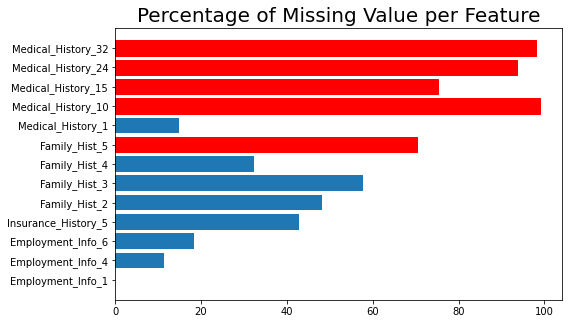

In [5]:
coba = tabel[tabel.columns[tabel.isnull().any()]].isnull().sum()/len(tabel) * 100
coba = pd.DataFrame(coba).reset_index().rename(columns={'index':'nama', 0:'persen'})

plt.figure(figsize=(8,5))
barlist = plt.barh('nama', 'persen', data=coba)
barlist[9].set_color('r')
barlist[7].set_color('r')
barlist[10].set_color('r')
barlist[11].set_color('r')
barlist[12].set_color('r')

plt.title('Percentage of Missing Value per Feature', fontdict={'fontsize':20})
print(tabel[tabel.columns[tabel.isnull().any()]].isnull().sum()/len(tabel) * 100)

In [4]:
miss_val = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 
            'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_10', 
            'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

In [5]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

for name in miss_val:
    tabel[name] = imp.fit_transform(tabel[name].values.reshape(-1, 1))

In [6]:
print('jumlah null:', tabel.isnull().sum().sum())

jumlah null: 0


Class=8, n=19489 (32.820%)
Class=4, n=1428 (2.405%)
Class=1, n=6207 (10.453%)
Class=6, n=11233 (18.917%)
Class=2, n=6552 (11.034%)
Class=7, n=8027 (13.518%)
Class=3, n=1013 (1.706%)
Class=5, n=5432 (9.148%)


Text(0.5, 1.0, 'The Number of Each Response')

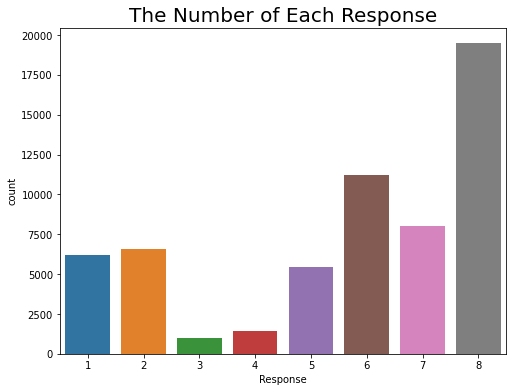

In [9]:
from collections import Counter

counter = Counter(tabel['Response'])
counter.items()

for k,v in counter.items():
    per = v / len(tabel['Response']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

#plotting
plt.figure(figsize=(8,6))
p = sns.countplot(x='Response', data=tabel)
plt.title('The Number of Each Response', fontdict={'fontsize':20})

In [7]:
dummy_var = [name for name in tabel.columns if '_Keyword_' in name]
num_var = cont_var + disc_var + dummy_var
cat_var = [name for name in tabel.columns 
           if name not in num_var]
cat_var.remove('Id')
cat_var.remove('Response')

In [8]:
y = tabel['Response']
X = tabel.drop(['Response', 'Id'], axis=1)

In [9]:
for col in X.columns:
    if col in cat_var:
        #print(col)
        col_dum = pd.get_dummies(X[col], prefix=col)
        X = X.drop(col,axis = 1)
        X = X.join(col_dum)

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X[num_var] = std.fit_transform(X[num_var])

In [14]:
real_feature = [name for name in X.columns]
fitur = X.copy()

In [21]:
#handling imbalance
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
#print(sorted(Counter(y).items()))